<a href="https://colab.research.google.com/github/122333D/project/blob/master/important.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/ctuCsv"

 All_162182.csv      ctu-10.csv		   groupby11.csv        test162182.csv
 All_train_162.csv   ctu-11.csv		   groupby162182.csv    yhat16219.csv
 All_train199.csv    ctu-42.csv		   groupby162.csv       yhat19.csv
 All_train_19.csv   'data test'		   groupby199.csv
 All_train19.csv    'data train'	   groupby19.csv
 All_train.csv	     finalPredictyesssss   rfcBotreduceft.pkl


In [0]:
import pandas as pd 
df = pd.read_csv('/content/gdrive/My Drive/ctuCsv/groupby19.csv')
df.head()

,Flow id,No.,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,Protocols in frame,Time to live,udp_Length,IP_Flags,Sequence number,Next sequence number,TCP Segment Len,tcp_Flags,isBot,Flow name,NumForward,Forward,IOPR,Total,FPL,NumPackets,BytesTotal,StdDevLen,SameLenPktRatio,Duration,AvgPktPerSec,BitsPerSec,APL,IAT,isNull,NPEx,reconnects
0,2578261,5437860,1937.800,147.32.86.58,2.136.152.92,UDP,357,48784,29387,eth:ethertype:ip:udp:wol,127,323.0,0x0000,NaN,NaN,NaN,0,0,2.136.152.92-147.32.86.58-29387-48784-UDP,0,0,-1.0,1,357,1,357,0.00,1.0,0.000000,0.00,0.0,357.000,0.000000,0,0,0
1,922661,1916650,672.836,83.208.169.216,147.32.85.26,TCP,70,26471,62860,eth:ethertype:ip:tcp,118,NaN,0x4000,16909705.0,16909721.0,16.0,24,0,83.208.169.216-147.32.85.26-26471-62860-TCP,1,1,1.0,2,70,2,130,5.00,1.0,0.000238,8403.36,4369750.0,65.000,0.000119,1,2,0
2,4865614,10407401,3462.620,147.32.85.103,74.125.108.137,TCP,66,60847,80,eth:ethertype:ip:tcp,62,NaN,0x4000,1777.0,1777.0,0.0,16,0,74.125.108.137-147.32.85.103-80-60847-TCP,0,0,-1.0,2,66,2,132,0.00,0.5,0.000167,11976.00,6323350.0,66.000,0.000083,2,4,2
3,3159587,6844893,2225.180,147.32.84.59,157.22.19.142,TCP,60,1575,80,eth:ethertype:ip:tcp,126,NaN,0x4000,869.0,869.0,0.0,16,0,157.22.19.142-147.32.84.59-80-1575-TCP,0,0,-1.0,1,60,1,60,0.00,1.0,0.000000,0.00,0.0,60.000,0.000000,1,1,0
4,4565672,9802276,3213.990,83.208.169.216,147.32.85.26,TCP,1506,26471,62860,eth:ethertype:ip:tcp,118,NaN,0x4000,65656149.0,65657601.0,1452.0,16,0,83.208.169.216-147.32.85.26-26471-62860-TCP,2,1,0.5,3,1506,3,1628,681.18,1.0,0.000605,4958.68,21527300.0,542.667,0.000202,1,3,0


In [0]:
df = df.sort_values(by=['Flow id']).reset_index(drop=True)

In [0]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['NBNS', 'SMB', 'PKIX-CRL', 'TCP', 'SIP', 'BROWSER', 'SMTP|IMF', 'SMTP', 'DNS', 'HTTP/XML', 'SSDP', 'SNMP', 'PKTC', 'Laplink', 'IRC', 'UDP', 'SSL', 'ICMP', 'NBSS', 'Socks', 'DCERPC', 'LANMAN', 'HTTP', 'SSLv2', 'TLSv1'])
df['Protocol_2']=num.fit_transform(df['Protocol']).astype('int')

In [0]:
df['IP_Flags'] = df['IP_Flags'].apply(lambda x:int(x,16) if x!='' else 0)

In [0]:
df = df.fillna(-1)

29
Success
Feature ranking:
Destination Port
1. feature Destination Port (0.142650)
2. feature Source Port (0.140747)
3. feature udp_Length (0.094869)
4. feature FPL (0.091480)
5. feature Time to live (0.078151)
6. feature Length (0.067990)
7. feature APL (0.067098)
8. feature BytesTotal (0.054394)
9. feature Protocol_2 (0.045394)
10. feature NumForward (0.034276)
11. feature Sequence number (0.029430)
12. feature SameLenPktRatio (0.027793)
13. feature IP_Flags (0.022031)
14. feature tcp_Flags (0.019183)
15. feature IOPR (0.016885)
16. feature Time (0.011046)
17. feature StdDevLen (0.010014)
18. feature Next sequence number (0.008130)
19. feature Forward (0.007826)
20. feature TCP Segment Len (0.007311)
21. feature NumPackets (0.004643)
22. feature Total (0.004021)
23. feature BitsPerSec (0.002876)
24. feature AvgPktPerSec (0.002857)
25. feature IAT (0.002774)
26. feature Duration (0.002680)
27. feature isNull (0.002033)
28. feature NPEx (0.000937)
29. feature reconnects (0.000480)


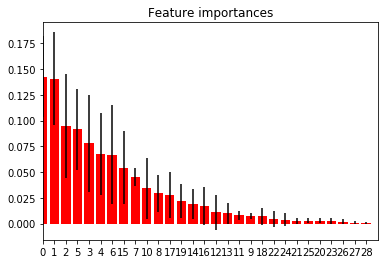

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)
d = ['Destination Port','Source Port','udp_Length','Length','FPL','Time to live','APL','Time','BytesTotal','Sequence number','Protocol_2','Next sequence number','TCP Segment Len','IOPR','StdDevLen',
     'IP_Flags','tcp_Flags','SameLenPktRatio','NumForward','Forward','BitsPerSec','IAT','Total','Duration','NumPackets','AvgPktPerSec','isNull','NPEx','reconnects']
X = np.asarray(df[['Destination Port','Source Port','udp_Length','Length','FPL','Time to live','APL','Time','BytesTotal','Sequence number','Protocol_2','Next sequence number','TCP Segment Len','IOPR','StdDevLen',
                       'IP_Flags','tcp_Flags','SameLenPktRatio','NumForward','Forward','BitsPerSec','IAT','Total','Duration','NumPackets','AvgPktPerSec','isNull','NPEx','reconnects']])
print(X.shape[1])
y = np.asarray(df['isBot'])
rfc = RandomForestClassifier(n_estimators=40) 

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print('Success')
# Print the feature ranking
print("Feature ranking:")
dii = []
dii = dict(zip(indices,d))
print(dii[0])
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, (dii[f]), importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([0, X.shape[1]])
plt.show()